In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplot
import seaborn as sb
import time

In [2]:
movies_genres_data=pd.read_csv("Movies_genres.csv")

In [3]:
def numeric_eliminator(total_text, index, column):
        string = ""
        #print(total_text.split())
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalpha()))
            # Conver all letters to lower-case
            word = word.lower()
            string += word + " "
        movies_genres_data[column][index] = string

In [4]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in movies_genres_data.iterrows():
    numeric_eliminator(row['Title'], index, 'Title')
# we print the time it took to preprocess whole titles
print((time.clock() - start_time)/60, "minutes")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


6.176678787111492 minutes


In [5]:
movies_genres_data.to_csv("movies_data.csv",index=False)

# Content Based Recommendation System

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
movies=pd.read_csv('movies.csv')

In [4]:
tf = TfidfVectorizer(analyzer='word',min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['Genres'])

In [5]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [6]:
titles = movies['Title']
indices = pd.Series(movies.index, index=movies['Title'])

In [7]:
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [8]:
genre_recommendations('Good Will Hunting (1997)').head(20)

25                                        Othello (1995)
26                                   Now and Then (1995)
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                                Dangerous Minds (1995)
35                               Dead Man Walking (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
52                                       Lamerica (1994)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
77                            Crossing Guard, The (1995)
79          White Balloon, The (Badkonake Sefid ) (1995)
81                       Antonia's Line (Antonia) (1995)
82       Once Upon a Time... When We Were Colored (1995)
89                    Journey of August King, The (1995)
92                             

In [9]:
genre_recommendations('Heat (1995)').head(20)

168                      Hackers (1995)
2209                       Ronin (1998)
2887    Someone to Watch Over Me (1987)
3694                         F/X (1986)
3695                       F/X 2 (1992)
1884      French Connection, The (1971)
2471              Corruptor, The (1999)
46                 Seven (Se7en) (1995)
49           Usual Suspects, The (1995)
517            Romeo Is Bleeding (1993)
653                  Purple Noon (1960)
1073              Reservoir Dogs (1992)
1331            Albino Alligator (1996)
1444            City of Industry (1997)
1601                 Playing God (1997)
1629                   Incognito (1997)
1640                  Red Corner (1997)
2140          Young and Innocent (1937)
2322              Simple Plan, A (1998)
2492                  True Crime (1999)
Name: Title, dtype: object

# Model based Collabarative System

In [2]:
moviesdata=pd.read_csv('Movies.csv',encoding='utf-8')
ratingsdata=pd.read_csv('Ratings.csv',encoding='utf-8')
usersdata=pd.read_csv("Users.csv",encoding='utf-8')

In [3]:
ratingsdata.columns
n_users = ratingsdata['UserID'].unique().shape[0]
n_movies = ratingsdata['MovieID'].unique().shape[0]

In [4]:
RatingsData=ratingsdata.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)

In [5]:
RatingsData.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Rd = RatingsData.as_matrix()
user_ratings_mean = np.mean(Rd, axis = 1)
Ratings_demeaned = Rd - user_ratings_mean.reshape(-1, 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
sparsity = round(1.0 - len(ratingsdata) / float(n_users * n_movies), 3)
print('The sparsity level of MovieLens1M dataset is ' ,  str(sparsity * 100) , '%')

The sparsity level of MovieLens1M dataset is  95.5 %


In [8]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 100)

In [9]:
sigma=np.diag(sigma)

In [10]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [11]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = RatingsData.columns)
preds.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,5.157608,0.184833,0.348341,-0.022609,0.139622,-0.156937,-0.061122,0.072117,0.018278,-0.372566,...,-0.111771,-0.002460,0.016625,-0.107081,-0.051609,0.022706,-0.114028,0.009476,0.070798,-0.195959
1,0.557186,0.296927,0.078853,-0.013888,0.028675,1.092160,-0.054492,0.114191,0.090106,1.695371,...,0.002564,-0.022910,-0.031687,0.072002,-0.008174,-0.418219,-0.225593,-0.005716,0.033955,0.039606
2,2.176318,0.396428,0.302057,-0.117164,-0.006330,0.077833,0.000836,0.064654,-0.018309,1.062417,...,0.036894,-0.008054,0.026507,0.053735,0.025591,0.024825,0.169800,0.061687,0.028985,-0.243151
3,0.194185,0.155507,0.046863,0.047477,-0.014495,0.247765,-0.057580,-0.006338,0.007387,-0.423240,...,-0.049155,-0.010652,0.007342,-0.005267,-0.031352,-0.166973,0.022989,-0.033161,-0.011156,-0.129075
4,0.243474,-0.491501,-0.008307,0.139973,-0.204174,1.664607,-0.133342,-0.047117,-0.118995,0.129404,...,0.054157,0.065400,0.004748,-0.072018,-0.106567,-0.590538,0.219853,-0.062958,0.105441,0.009634


In [16]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.UserID == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['MovieID'].isin(user_full['MovieID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'MovieID',
               right_on = 'MovieID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [17]:
already_rated, predictions = recommend_movies(preds, 1310, moviesdata, ratingsdata, 20)

User 1310 has already rated 24 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [19]:
# Top 20 movies that User 1310 has rated 
already_rated.head(20)

,UserID,MovieID,Rating,Timestamp,Title,Genres
5,1310,2248,5,974781573,Say Anything... (1989),Comedy|Drama|Romance
6,1310,2620,5,974781573,This Is My Father (1998),Drama|Romance
7,1310,3683,5,974781935,Blood Simple (1984),Drama|Film-Noir
15,1310,1704,5,974781573,Good Will Hunting (1997),Drama
1,1310,1293,5,974781839,Gandhi (1982),Drama
12,1310,3101,4,974781573,Fatal Attraction (1987),Thriller
11,1310,1343,4,974781534,Cape Fear (1991),Thriller
20,1310,2000,4,974781892,Lethal Weapon (1987),Action|Comedy|Crime|Drama
18,1310,3526,4,974781892,Parenthood (1989),Comedy|Drama
17,1310,3360,4,974781935,Hoosiers (1986),Drama


In [20]:
# Top 20 movies that User 1310 hopefully will enjoy
predictions

,MovieID,Title,Genres
1618,1674,Witness (1985),Drama|Romance|Thriller
1202,1225,Amadeus (1984),Drama
1216,1242,Glory (1989),Action|Drama|War
1233,1259,Stand by Me (1986),Adventure|Comedy|Drama
1187,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
1880,1961,Rain Man (1988),Drama
1877,1957,Chariots of Fire (1981),Drama
1938,2020,Dangerous Liaisons (1988),Drama|Romance
1220,1246,Dead Poets Society (1989),Drama
1887,1968,"Breakfast Club, The (1985)",Comedy|Drama


# Memory based Collaborative System

In [90]:
movies=pd.read_csv("movies_data.csv")

In [91]:
def classification(text,index,column):
    class1=['Action','Adventure','Thriller','Horror']
    class2=['Sci-Fi','Crime','Romance',"Children's"]
    others=['Western','War','Mystery','Musical','Film-Noir','Fantasy','Documentary','Animation']
    if text in class1:
        movies[column][index]='Class1'
    elif text in class2:
        movies[column][index]='Class2'
    elif text in others:
        movies[column][index]='Others'
    else:
        movies[column][index]=text

In [92]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in movies.iterrows():
    classification(row['Genres'], index, 'Genres')
# we print the time it took to preprocess whole titles
print((time.clock() - start_time)/60, "minutes")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: Set

3.9755873475563326 minutes


In [93]:
movies.head(30)

,MoviesId,Title,Genres
0,1,toy story,Others
1,1,toy story,Class2
2,1,toy story,Comedy
3,2,jumanji,Class1
4,2,jumanji,Class2
5,2,jumanji,Others
6,3,grumpier old men,Comedy
7,3,grumpier old men,Class2
8,4,waiting to exhale,Comedy
9,4,waiting to exhale,Drama


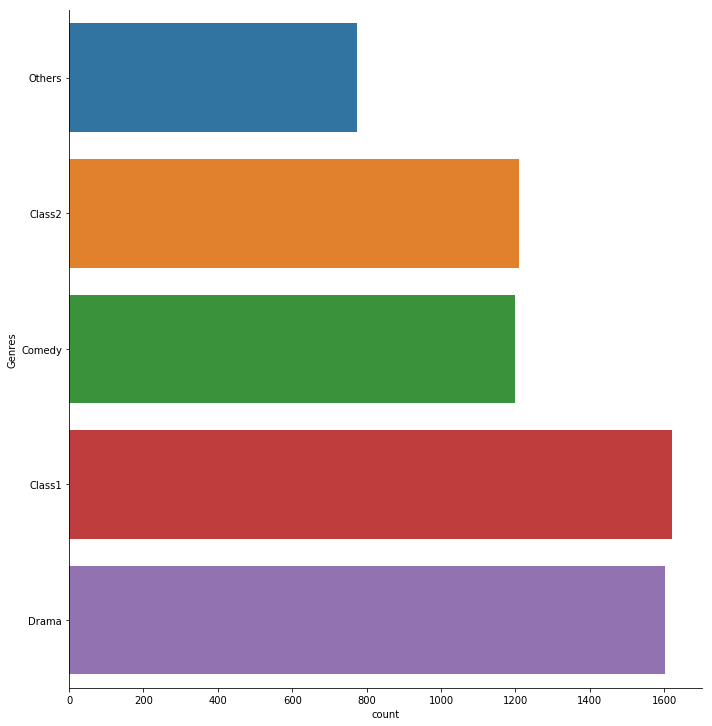

In [94]:
ax= sb.catplot(y="Genres",data=movies, kind="count",height=10)

In [95]:
Movies=movies.drop_duplicates(inplace=False)

In [96]:
Movies.head(20)

,MoviesId,Title,Genres
0,1,toy story,Others
1,1,toy story,Class2
2,1,toy story,Comedy
3,2,jumanji,Class1
4,2,jumanji,Class2
5,2,jumanji,Others
6,3,grumpier old men,Comedy
7,3,grumpier old men,Class2
8,4,waiting to exhale,Comedy
9,4,waiting to exhale,Drama


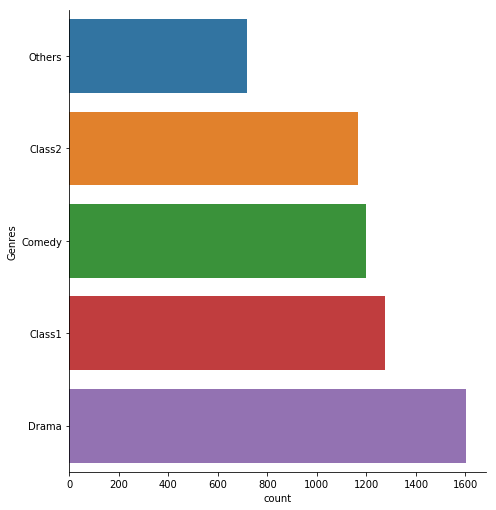

In [109]:
ax= sb.catplot(y="Genres",data=Movies, kind="count",height=7)

In [98]:
Movies.groupby('Genres').count()

,MoviesId,Title
Genres,,
Class1,1275,1275
Class2,1166,1166
Comedy,1200,1200
Drama,1603,1603
Others,717,717


In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [100]:
le = preprocessing.LabelEncoder()

In [101]:
transform=le.fit_transform(movies['Genres'])

In [102]:
le.classes_

array(['Class1', 'Class2', 'Comedy', 'Drama', 'Others'], dtype=object)

In [103]:

X_train, X_test, y_train, y_test = train_test_split(movies['MoviesId'].values, transform, test_size=0.25, random_state=42)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train.reshape(-1,1)


array([[0],
       [0],
       [0],
       ...,
       [4],
       [2],
       [3]], dtype=int64)

In [104]:
neigh = KNeighborsClassifier(n_neighbors=10)


In [105]:
start_time = time.clock()
neigh.fit(X_train, y_train) 
print((time.clock() - start_time)/60, "minutes")

0.00010548719601501943 minutes


In [106]:
neigh.score(X_test,y_test)

0.266541822721598

In [107]:
neigh.predict(X_test)

array([1, 4, 2, ..., 0, 0, 3], dtype=int64)

In [108]:
X_test

array([[1523],
       [3369],
       [1459],
       ...,
       [2969],
       [3710],
       [2344]], dtype=int64)

In [30]:
type(movies['MoviesId'].values)

numpy.ndarray